# 비지도 학습 : 차원축소, 군집화

### [1] 차원 축소
### - PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소 알고리즘, 비지도 학습
- 이미지 데이터의 차원 축소, 자연언어 텍스트 의미 분석
- 원본 데이터의 정보 유실이 최소화 되도록 축소시킨다
- 데이터의 변동성(Variance)을 기반으로 축울 생성하여 축소하는 알고리즘이다  
- 이미지 분류등의 분류 수행시 과적합을 방지하여 예측 성능 향상

In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# iris 데이터를 가져오기
iris = load_iris()
type(iris)  # sklearn.utils.Bunch ==> numpy array의 묶음
type(iris.data)    # X     numpy array
type(iris.target)  # Y     numpy array 
# numpy array를 DataFrame으로 변환
# sepal : 꽃받침    
# petal : 꽃잎
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df  # 원본 컬럼 이름을 출력

# 컬럼 이름을 새로 만들어서 데이터 프레임을 생성
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)

# target 은 'setosa' : 0,  'versicolor' : 1   ,'virginica':2
# 답이 3개 이상인 multi-classification 
iris_df['target'] = iris.target
iris_df  # (150, 5) 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


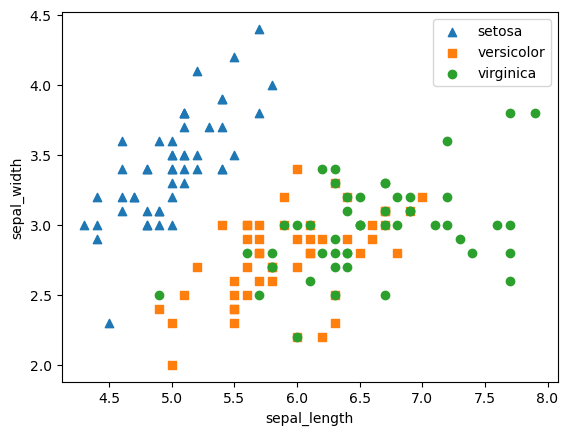

In [10]:
# 원본 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal_length']
    y = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [18]:
# 데이터를 표준화하여 정규분포로 전처리
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)
iris_scaled

# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 축소될 차원 설정: 2차원
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape) #  (150,2)

# PCA 변환 데이터를 target을 추가하여 데이터 프레임으로 변경
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


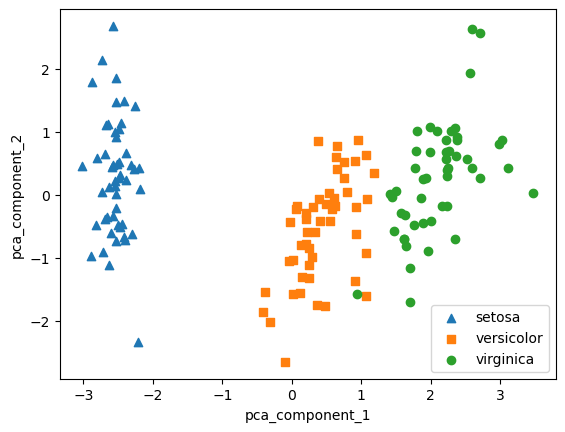

In [19]:
# PCA 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [20]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156,n_estimators=100)

# 원본 데이터로 교차 검증
scores = cross_val_score(rcf,iris.data,iris.target,
                         scoring='accuracy', cv=3)
print(scores,scores.mean())
# [0.98039216 0.92156863 0.95833333]

[0.98 0.94 0.96] 0.96


In [23]:
# PCA 데이터로 교차 검증
# pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
pca_x = iris_df_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_x,iris.target,
                         scoring='accuracy', cv=3)
print('pca score:',scores_pca,scores_pca.mean())

# pca score: [0.98039216 0.98039216 1.        ]
# 결론 PCA 변환하여 예측한 결과의 정확도가 약간 상승했다

# PCA 변환된 데이터 세트가 원본 보다 더 나은 정확도를나타내는 경우는 드물다
# 4개의 피처를 2개로 줄여 예측 성능에 영향을 받지 않을 정도로 PCA 변환이 잘 적용됨

pca score: [0.98 0.98 1.  ] 0.9866666666666667


### [2]  군집화(Clustering,클러스터링)
#### 비지도 학습 알고리즘

- 고객이나 마켓 및 사회 경제 활동 세분화(Segmentation)
- 영상 분야 : 이미지 검출, 세분화, 트래킹
- 이상 검출(Abnormally Detection)

#### : K-Means(K-평균) , Mean Shift(평균이동), 친근도전파

In [27]:
from sklearn.cluster import KMeans

iris = load_iris()
columns = ['sepal_length',
           'sepal_width',
           'petal_length',
           'petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF.shape # (150, 4)
irisDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
# KMeans 객체를 생성하고 군집화 수행

# sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10,
# max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0)
# 'k-means++' : centroid 를 random으로 잡지 않고 초기화하는 알고리즘을 사용
#  max_iter : 최대 반복 횟수, 최대값 이내에서 모든 데이터의 중심점 이동이 없으면 종료한다

kmeans.fit(irisDF)
print(kmeans)

C:\Users\storm\anaconda3\envs\tf210\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\storm\anaconda3\envs\tf210\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)


In [30]:
print(kmeans.labels_)          # 각 데이터트가 속한 군집 중심점의 레이블
print(kmeans.labels_.shape)    # (150,)
print(kmeans.cluster_centers_) # 중심점 실제 좌표값
print(kmeans.cluster_centers_.shape) # (3,4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
(3, 4)


In [31]:
# 예측
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
irisDF['cluster'] = kmeans.labels_
irisDF['target'] = iris.target
irisDF

irisDF.groupby(['target','cluster'])['sepal_length'].count()
# target이 0인 데이터는 1번 군집에 50개  , 'setoasa'는  완벽히 분리 
# target이 1인 데이터는 0번 군집에 48개,2번 군집에 2개
# target이 2인 데이터는 0번 군집에 14개, 2번 군집에 36개로 생성

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64